In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sa
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
df=pd.DataFrame({
    "Treatment":np.repeat(["T1","T2","T3"],15),
    "bloque":np.tile(np.repeat(["b1","b2","b3"],5),3),
    "Rto":np.concatenate((np.random.normal(15,0.3,15),
                          np.random.normal(25,0.8,15),
                          np.random.normal(20,1.2,15)))
})
df.groupby(["Treatment","bloque"])["Rto"].describe().round(2)

count   mean   std    min    25%    50%    75%    max
Treatment bloque                                                       
T1        b1        5.0  15.13  0.11  14.98  15.07  15.14  15.18  15.27
          b2        5.0  15.21  0.28  14.80  15.02  15.35  15.41  15.45
          b3        5.0  15.00  0.22  14.87  14.89  14.90  14.96  15.38
T2        b1        5.0  25.01  0.94  23.79  24.31  25.22  25.74  25.98
          b2        5.0  24.91  0.56  24.54  24.67  24.70  24.74  25.91
          b3        5.0  25.04  0.66  24.09  24.69  25.28  25.30  25.83
T3        b1        5.0  20.80  1.21  19.03  20.59  20.87  21.06  22.43
          b2        5.0  19.56  0.54  18.72  19.36  19.76  19.80  20.13
          b3        5.0  19.73  1.37  17.50  19.52  20.02  20.77  20.85

In [5]:
mod = smf.ols('Rto ~ Treatment + bloque', data = df).fit()
anova=sa.stats.anova_lm(mod)
print(anova)

             df      sum_sq     mean_sq           F        PR(>F)
Treatment   2.0  731.035316  365.517658  592.596259  1.892836e-30
bloque      2.0    1.640915    0.820457    1.330168  2.758763e-01
Residual   40.0   24.672289    0.616807         NaN           NaN


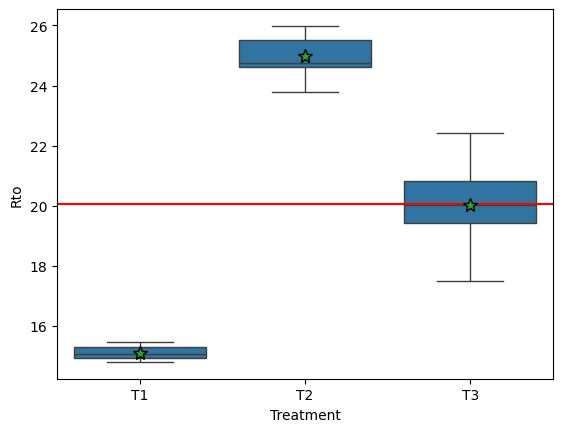

In [6]:
graf=sns.boxplot(y = df['Rto'], x = df['Treatment'], data = df,showmeans=True,
            meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "10"},
            order=["T1","T2","T3"])
graf.axhline(df["Rto"].mean(),color="red")

In [7]:
# Supuestos
predichos = mod.predict()
predichos
residuos = df['Rto'] - predichos

# normalidad
stats.shapiro(residuos)

ShapiroResult(statistic=0.9424418896904795, pvalue=0.026461268687100036)

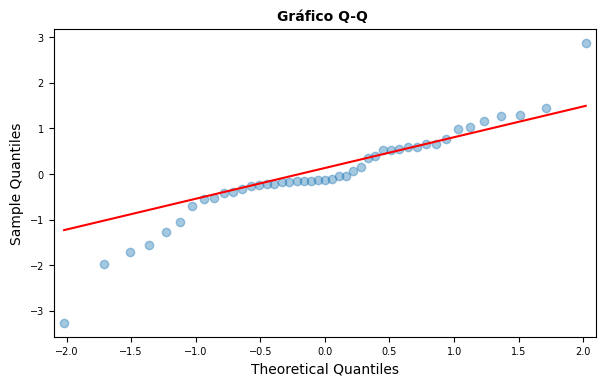

In [8]:
# qq plot
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q ', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [9]:
# homocedasticidad
stats.bartlett(df[df['Treatment'] == 'T1']['Rto'],
              df[df['Treatment'] == 'T2']['Rto'],
              df[df['Treatment'] == 'T3']['Rto'])

BartlettResult(statistic=28.338553138053918, pvalue=7.020392175487486e-07)

In [10]:
# tukey
print(pairwise_tukeyhsd(endog = df ['Rto'],
                          groups = df['Treatment'],
                          alpha = 0.05 ))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    T1     T2   9.8727   0.0  9.1706 10.5749   True
    T1     T3   4.9151   0.0   4.213  5.6173   True
    T2     T3  -4.9576   0.0 -5.6598 -4.2554   True
---------------------------------------------------
